In [4]:
!pip3 install networkx

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.7 MB/s eta 0:00:0000:0100:01


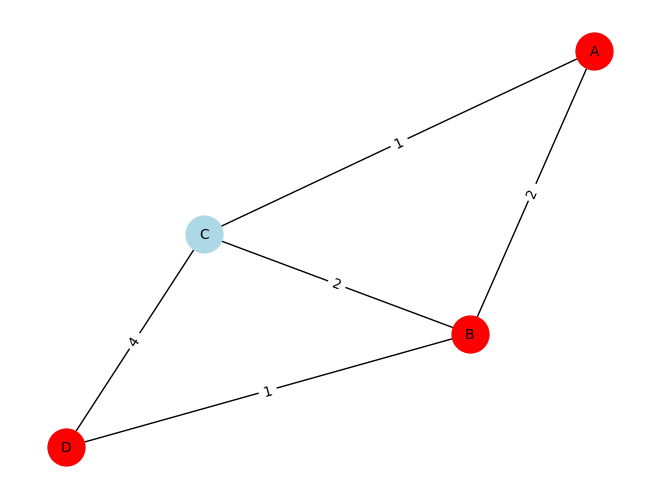

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra(graph, start):
    distances = {}
    for node in graph:
        distances[node] = float('infinity')

    distances[start] = 0
    unvisited_nodes = list(graph)

    while unvisited_nodes:
        current_node = min(unvisited_nodes, key=lambda node: distances[node])

        if distances[current_node] == float('infinity'):
            break

        unvisited_nodes.remove(current_node)

        for neighbor, weight in graph[current_node].items():
            distance = distances[current_node] + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance

    return distances


# グラフを定義
graph = {
    'A': {'B': 2, 'C': 1}, # Aと隣り合っているノードはBとC
    'B': {'A': 2, 'C': 2, 'D': 1}, # Bと隣り合っているノードはAとCとD
    'C': {'A': 1, 'B': 2, 'D': 4}, # Cと隣り合っているノードはAとBとD
    'D': {'B': 1, 'C': 4} # Dと隣り合っているノードはBとC
}

start_node = 'A'
result = dijkstra(graph, start_node)

# networkx グラフを作成
G = nx.Graph()
for node, edges in graph.items():
    G.add_node(node)
    for edge, weight in edges.items():
        G.add_edge(node, edge, weight=weight)

# 最短経路を計算
shortest_path = nx.shortest_path(G, source=start_node, target='D', weight='weight')

# グラフの描画
pos = nx.spring_layout(G, seed=42)  # レイアウトを設定
labels = {node: node for node in G.nodes()}  # ノードのラベル

nx.draw(G, pos, with_labels=True, labels=labels, node_size=700, node_color='lightblue', font_size=10)
edge_labels = {(node, neighbor): G[node][neighbor]['weight'] for node, neighbor in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
# 最短経路を赤で表示
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='red', node_size=700)

plt.show()



In [16]:
print(result)

{'A': 0, 'B': 2, 'C': 1, 'D': 3}


In [54]:
!pip3 install sympy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 1.0 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 KB 1.5 MB/s eta 0:00:0000:0100:01
